# PID Tuning using the good old Ziegler-Nichols method

We write our PID control as following:

$u(t)=K_p\left(e(t)+\frac{1}{T_i}\int_0^t e(\tau)d\tau + T_d \frac{de(t)}{dt} \right)$

Our parameters are then $Kp$ the proportional gain, $Ti$ the integrator time constant and $Td$ the derivative time constant.

In [1]:
import orbita_sdk
import numpy as np
import time
import matplotlib.pyplot as plt

In [11]:
orb=orbita_sdk.orbita.OrbitaSDK('/dev/ttyUSB0')

In [87]:
orb.get_pid()

(0.5299999713897705, 0.0, 0.0)

Start with all parameters to 0

In [59]:
orb.set_pid(0.0,0.0,0.0)

Find $K_u$ the "critical gain", the lowest gain at which consistent oscillation occur, along with $T_u$ the critical oscillation period. 

In [8]:
def step():
    disks=[]
    goals=[]
    orb.set_target_disk_position([0,0,0])
    time.sleep(3)
    goal=0.0
    for i in range(400):
        if i == 50:
            goal=2*np.pi
            orb.set_target_disk_position([goal,goal,goal])
        goals.append(goal)
        disks.append(orb.get_current_disk_position())
        time.sleep(0.005)
    disks=np.array(disks)
    goals=np.array(goals)
    %matplotlib notebook
    fig, ax = plt.subplots()
    ax.plot(disks,label='pos')
    ax.plot(goals,label='target')
    ax.legend()

In [88]:
orb.enable_torque()

<IPython.core.display.Javascript object>


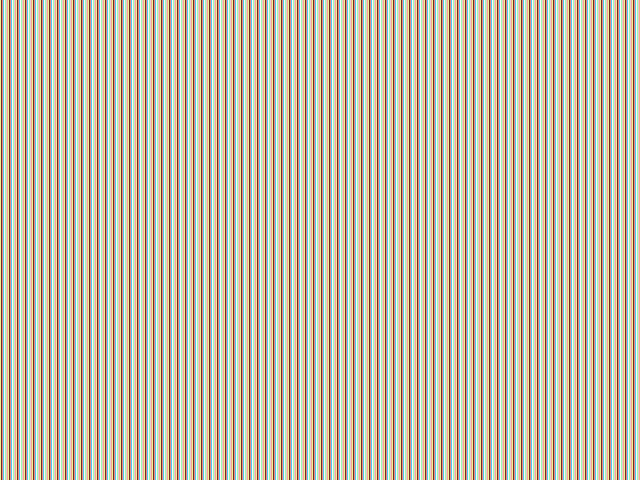

In [85]:
orb.set_pid(0.53,0.0,0.0)
step()

In [86]:
orb.disable_torque()

We find a $K_u=0.53$ with $T_u=0.05s$ 

In [31]:
Ku=0.53
Tu=0.05

In [32]:
orb.set_pid(Ku*0.6,Tu*0.5,Tu*0.125)

In [33]:
orb.enable_torque()

<IPython.core.display.Javascript object>


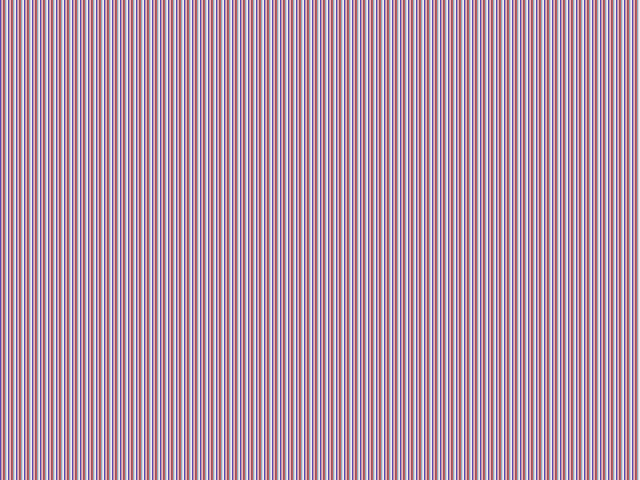

In [34]:
step()

In [39]:
orb.set_pid(Ku*0.33,Tu*0.5,Tu*0.33)

<IPython.core.display.Javascript object>


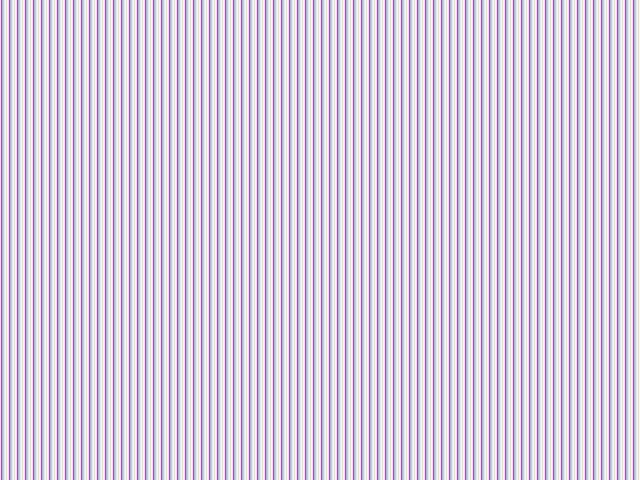

In [53]:
step()

In [67]:
orb.enable_torque()

In [66]:
orb.disable_torque()